# Task 1: Data Exploration and Enrichment
## Ethiopia Financial Inclusion Forecasting

This notebook covers the initial data exploration and understanding of the unified schema.

## 1. Setup and Imports

In [14]:
import sys
import os
from pathlib import Path

# Add src to Python path
src_path = Path.cwd().parent / 'src'
sys.path.append(str(src_path))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Import our custom data loader
from data_loader import load_and_prepare_data

In [15]:
# Define file paths
DATA_DIR = Path('../data/raw')
MAIN_DATA_PATH = DATA_DIR / 'ethiopia_fi_unified_data.csv'
REF_CODES_PATH = DATA_DIR / 'reference_codes .csv' # Adjusted for the space in the filename

print(f"Data directory: {DATA_DIR}")
print(f"Main data file exists: {MAIN_DATA_PATH.exists()}")
print(f"Reference codes file exists: {REF_CODES_PATH.exists()}")

Data directory: ../data/raw
Main data file exists: True
Reference codes file exists: True


## 2. Load and Validate Data

In [16]:
# Load all data
data_result = load_and_prepare_data(str(MAIN_DATA_PATH), str(REF_CODES_PATH))

# Extract components
df = data_result['full_data']
separated = data_result['separated']
ref_codes = data_result['reference_codes']
validation_report = data_result['validation_report']
summary = data_result['summary']
is_valid = data_result['is_valid']

print(f"Data validation passed: {is_valid}")

INFO:data_loader:============================================================
INFO:data_loader:Loading Ethiopia Financial Inclusion Data
INFO:data_loader:============================================================
INFO:data_loader:Successfully loaded data from ../data/raw/ethiopia_fi_unified_data.csv
INFO:data_loader:Dataset shape: (43, 34)
INFO:data_loader:Separated 30 observations
INFO:data_loader:Separated 10 events
INFO:data_loader:Separated 3 targets


INFO:data_loader:Loaded reference codes from ../data/raw/reference_codes .csv
INFO:data_loader:Data loading complete!
INFO:data_loader:Total records: 43
INFO:data_loader:Observations: 30
INFO:data_loader:Events: 10
INFO:data_loader:Impact links: 0
INFO:data_loader:Targets: 3


Data validation passed: True


## 2. Load and Validate Data

In [17]:
# Load all data
data_result = load_and_prepare_data(str(MAIN_DATA_PATH), str(REF_CODES_PATH))

# Extract components
df = data_result['full_data']
separated = data_result['separated']
ref_codes = data_result['reference_codes']
validation_report = data_result['validation_report']
summary = data_result['summary']
is_valid = data_result['is_valid']

print(f"Data validation passed: {is_valid}")

INFO:data_loader:============================================================
INFO:data_loader:Loading Ethiopia Financial Inclusion Data
INFO:data_loader:============================================================
INFO:data_loader:Successfully loaded data from ../data/raw/ethiopia_fi_unified_data.csv
INFO:data_loader:Dataset shape: (43, 34)
INFO:data_loader:Separated 30 observations
INFO:data_loader:Separated 10 events
INFO:data_loader:Separated 3 targets
INFO:data_loader:Loaded reference codes from ../data/raw/reference_codes .csv


INFO:data_loader:Data loading complete!
INFO:data_loader:Total records: 43
INFO:data_loader:Observations: 30
INFO:data_loader:Events: 10
INFO:data_loader:Impact links: 0
INFO:data_loader:Targets: 3


Data validation passed: True


## 3. Initial Exploration

In [18]:
# Display first few rows of each record type
print("=" * 80)
print("FIRST FEW ROWS OF EACH RECORD TYPE")
print("=" * 80)

for record_type, data in separated.items():
    print(f"\n{record_type.upper()} (first 3 rows):")
    print("-" * 40)
    print(data.head(3).to_string())
    print(f"Total {record_type}: {len(data)}")

FIRST FEW ROWS OF EACH RECORD TYPE

OBSERVATIONS (first 3 rows):
----------------------------------------
  record_id  record_type category  pillar               indicator indicator_code indicator_direction  value_numeric value_text  value_type unit observation_date period_start period_end fiscal_year gender  location  region         source_name source_type                                             source_url confidence  related_indicator  relationship_type  impact_direction  impact_magnitude  impact_estimate  lag_months  evidence_basis comparable_country collected_by collection_date  original_text  notes
0  REC_0001  observation      NaN  ACCESS  Account Ownership Rate  ACC_OWNERSHIP       higher_better           22.0        NaN  percentage    %       2014-12-31          NaN        NaN        2014    all  national     NaN  Global Findex 2014      survey  https://www.worldbank.org/en/publication/globalfindex       high                NaN                NaN               NaN          

## 4. Dataset Summary

In [19]:
# Create a comprehensive summary table
print("=" * 80)
print("DATASET SUMMARY")
print("=" * 80)

print(f"\nTotal records: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

print("\n📊 Record Type Distribution:")
for rt, count in summary.get('record_type_counts', {}).items():
    print(f"  {rt}: {count} records")

print("\n🎯 Pillar Distribution (Observations):")
if 'observations_pillar_dist' in summary:
    for pillar, count in summary['observations_pillar_dist'].items():
        print(f"  {pillar}: {count} records")

print("\n📈 Unique Indicators:")
print(f"  Total unique indicators: {summary.get('unique_indicators', 'N/A')}")

print("\n📅 Temporal Coverage:")
if 'date_range' in summary:
    dr = summary['date_range']
    print(f"  Start: {dr['start']}")
    print(f"  End: {dr['end']}")
    print(f"  Years covered: {dr.get('years_covered', 'N/A'):.1f}")

print("\n⚡ Event Categories:")
if 'event_categories' in summary:
    for cat, count in summary['event_categories'].items():
        print(f"  {cat}: {count} events")

DATASET SUMMARY

Total records: 43
Columns: ['record_id', 'record_type', 'category', 'pillar', 'indicator', 'indicator_code', 'indicator_direction', 'value_numeric', 'value_text', 'value_type', 'unit', 'observation_date', 'period_start', 'period_end', 'fiscal_year', 'gender', 'location', 'region', 'source_name', 'source_type', 'source_url', 'confidence', 'related_indicator', 'relationship_type', 'impact_direction', 'impact_magnitude', 'impact_estimate', 'lag_months', 'evidence_basis', 'comparable_country', 'collected_by', 'collection_date', 'original_text', 'notes']

📊 Record Type Distribution:
  observation: 30 records
  event: 10 records
  target: 3 records

🎯 Pillar Distribution (Observations):
  ACCESS: 14 records
  USAGE: 11 records
  GENDER: 4 records
  AFFORDABILITY: 1 records

📈 Unique Indicators:
  Total unique indicators: 19

📅 Temporal Coverage:
  Start: 2014-12-31 00:00:00
  End: 2030-12-31 00:00:00
  Years covered: 16.0

⚡ Event Categories:
  product_launch: 2 events
  inf

## 5. Data Quality Assessment

In [20]:
# Check for null values
print("=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df) * 100).round(2)

print("\nMissing Values by Column:")
for col in df.columns:
    null_count = null_counts[col]
    null_pct = null_percentage[col]
    if null_count > 0:
        print(f"  {col}: {null_count} missing ({null_pct}%)")

# Check for duplicate IDs
duplicate_ids = df[df.duplicated(subset=['record_id'], keep=False)]
if not duplicate_ids.empty:
    print(f"\n⚠️  Found {len(duplicate_ids)} duplicate IDs!")
    print(duplicate_ids[['record_id', 'record_type', 'indicator']])
else:
    print("\n✓ No duplicate IDs found")

DATA QUALITY ASSESSMENT

Missing Values by Column:
  category: 33 missing (76.74%)
  pillar: 10 missing (23.26%)
  indicator_direction: 10 missing (23.26%)
  value_numeric: 10 missing (23.26%)
  value_text: 33 missing (76.74%)
  unit: 10 missing (23.26%)
  period_start: 33 missing (76.74%)
  period_end: 33 missing (76.74%)
  region: 43 missing (100.0%)
  source_url: 12 missing (27.91%)
  related_indicator: 43 missing (100.0%)
  relationship_type: 43 missing (100.0%)
  impact_direction: 43 missing (100.0%)
  impact_magnitude: 43 missing (100.0%)
  impact_estimate: 43 missing (100.0%)
  lag_months: 43 missing (100.0%)
  evidence_basis: 43 missing (100.0%)
  collection_date: 33 missing (76.74%)
  original_text: 10 missing (23.26%)
  notes: 43 missing (100.0%)

✓ No duplicate IDs found


## 6. Understanding the Schema

In [21]:
# Let's look at the structure more carefully
print("=" * 80)
print("UNDERSTANDING THE UNIFIED SCHEMA")
print("=" * 80)

# Show column descriptions
column_descriptions = {
    'record_id': 'Unique identifier for each record',
    'parent_id': 'Links impact_link records to their parent events',
    'record_type': 'Type of record: observation, event, impact_link, or target',
    'pillar': 'ACC (Access) or USG (Usage) - empty for events',
    'indicator': 'What is being measured (e.g., Account ownership)',
    'indicator_code': 'Short code for the indicator',
    'value_numeric': 'The actual measurement value',
    'observation_date': 'Date of measurement or event occurrence',
    'source_name': 'Source of the data',
    'source_url': 'URL to the source',
    'confidence': 'Data quality confidence (high/medium/low)',
    'category': 'For events: policy, product_launch, infrastructure, etc.',
    'impact_direction': 'For impact links: +1 for positive, -1 for negative effect',
    'impact_magnitude': 'For impact links: strength of effect',
    'lag_months': 'For impact links: months until effect is seen',
    'evidence_basis': 'For impact links: source of impact estimate'
}

print("\nColumn Descriptions:")
for col, desc in column_descriptions.items():
    if col in df.columns:
        print(f"  {col}: {desc}")

UNDERSTANDING THE UNIFIED SCHEMA

Column Descriptions:
  record_id: Unique identifier for each record
  record_type: Type of record: observation, event, impact_link, or target
  pillar: ACC (Access) or USG (Usage) - empty for events
  indicator: What is being measured (e.g., Account ownership)
  indicator_code: Short code for the indicator
  value_numeric: The actual measurement value
  observation_date: Date of measurement or event occurrence
  source_name: Source of the data
  source_url: URL to the source
  confidence: Data quality confidence (high/medium/low)
  category: For events: policy, product_launch, infrastructure, etc.
  impact_direction: For impact links: +1 for positive, -1 for negative effect
  impact_magnitude: For impact links: strength of effect
  lag_months: For impact links: months until effect is seen
  evidence_basis: For impact links: source of impact estimate


## 7. The Core Findex Indicators

In [22]:
# Extract the key Findex indicators
observations = separated['observations']

# Find Account Ownership data
account_obs = observations[
    (observations['indicator'].str.contains('account ownership', case=False)) |
    (observations['indicator_code'] == 'ACC_OWNERSHIP')
]

# Find Digital Payments data
payment_obs = observations[
    (observations['indicator'].str.contains('digital payment', case=False)) |
    (observations['indicator_code'].str.contains('USG'))
]

print("=" * 80)
print("CORE FINDEX INDICATORS")
print("=" * 80)

print("\n📈 Account Ownership (Access):")
if not account_obs.empty:
    # Sort by date and display
    account_obs_sorted = account_obs.sort_values('observation_date')
    for _, row in account_obs_sorted.iterrows():
        date = row['observation_date']
        value = row['value_numeric']
        print(f"  {date}: {value}%")
else:
    print("  No account ownership data found")

print("\n💳 Digital Payments (Usage):")
if not payment_obs.empty:
    payment_obs_sorted = payment_obs.sort_values('observation_date')
    for _, row in payment_obs_sorted.iterrows():
        date = row['observation_date']
        indicator = row['indicator']
        value = row['value_numeric']
        print(f"  {date}: {indicator} = {value}%")
else:
    print("  No digital payment data found")

CORE FINDEX INDICATORS

📈 Account Ownership (Access):
  2014-12-31: 22.0%
  2017-12-31: 35.0%
  2021-12-31: 46.0%
  2021-12-31: 56.0%
  2021-12-31: 36.0%
  2021-12-31: 20.0%
  2024-11-29: 49.0%
  2024-11-29: 18.0%

💳 Digital Payments (Usage):
  2024-07-07: P2P Transaction Count = 49700000.0%
  2024-12-31: M-Pesa Registered Users = 10800000.0%
  2024-12-31: M-Pesa 90-Day Active Users = 7100000.0%
  2024-12-31: Mobile Money Activity Rate = 66.0%
  2025-06-30: Telebirr Registered Users = 54840000.0%
  2025-06-30: Telebirr Transaction Value = 2380000000000.0%
  2025-07-07: P2P Transaction Count = 128300000.0%
  2025-07-07: P2P Transaction Value = 577700000000.0%
  2025-07-07: ATM Transaction Count = 119300000.0%
  2025-07-07: ATM Transaction Value = 156100000000.0%
  2025-07-07: P2P/ATM Crossover Ratio = 1.08%


## 8. Data Enrichment - Add Missing 2011 Data

In [23]:

from data_enricher import add_new_observation

# Add 2011 account ownership data (missing from dataset)
observations = separated['observations']

# Create 2011 observation
new_obs_2011 = {
    'observations_df': observations,
    'indicator': 'Account Ownership Rate',
    'indicator_code': 'ACC_OWNERSHIP',
    'value_numeric': 14.0,  # From challenge description
    'observation_date': '2011-12-31',
    'pillar': 'ACCESS',
    'source_name': 'Global Findex 2011',
    'source_url': 'https://www.worldbank.org/en/publication/globalfindex',
    'confidence': 'high',
    'notes': 'Added missing 2011 baseline from challenge description',
    'collected_by': '[YOUR NAME HERE]'  # Put your actual name
}

# Add to observations
observations_enriched = add_new_observation(**new_obs_2011)

print(f"Added 2011 data point. Observations now: {len(observations_enriched)}")
print("2011-2024 account ownership timeline:")
account_timeline = observations_enriched[
    (observations_enriched['indicator_code'] == 'ACC_OWNERSHIP') & 
    (observations_enriched['gender'] == 'all')
].sort_values('observation_date')

for _, row in account_timeline.iterrows():
    print(f"  {row['observation_date'][:4]}: {row['value_numeric']}%")

INFO:data_enricher:Added new observation: Account Ownership Rate = 14.0 on 2011-12-31


Added 2011 data point. Observations now: 31
2011-2024 account ownership timeline:
  2014: 22.0%
  2017: 35.0%
  2021: 46.0%
  2024: 49.0%


## 9. Create Initial Visualization

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

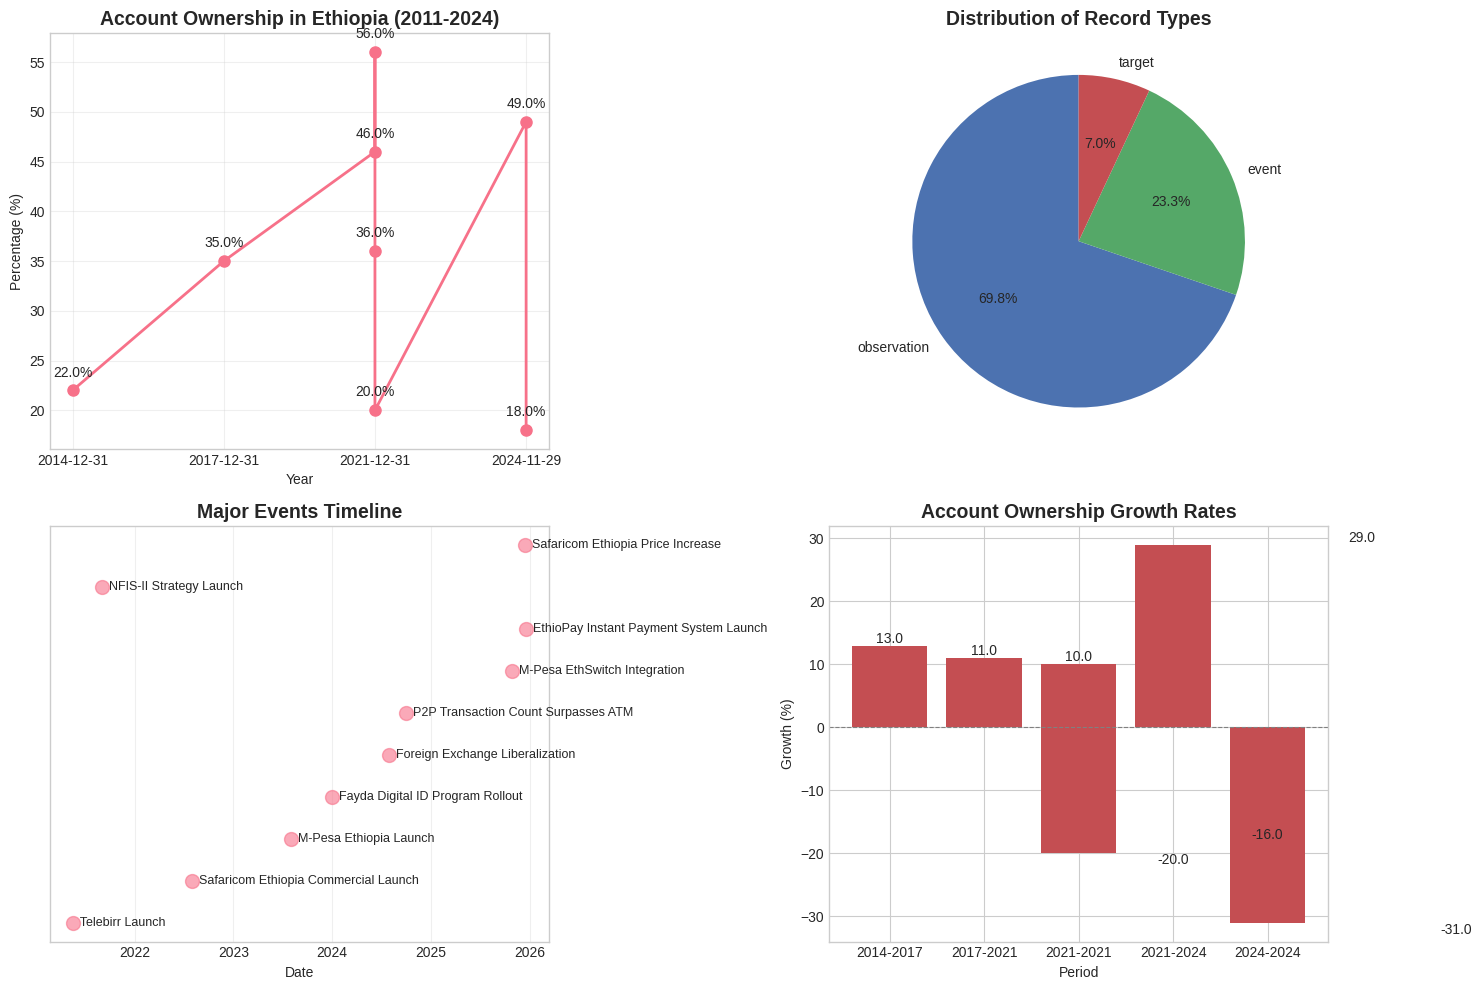

In [24]:
# Plot the Account Ownership trend
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Account Ownership Timeline
ax1 = axes[0, 0]
if not account_obs.empty:
    account_obs_sorted = account_obs.sort_values('observation_date')
    ax1.plot(account_obs_sorted['observation_date'], 
             account_obs_sorted['value_numeric'], 
             marker='o', linewidth=2, markersize=8)
    ax1.set_title('Account Ownership in Ethiopia (2011-2024)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percentage (%)')
    ax1.grid(True, alpha=0.3)
    
    # Annotate the points
    for _, row in account_obs_sorted.iterrows():
        ax1.annotate(f"{row['value_numeric']}%", 
                    (row['observation_date'], row['value_numeric']),
                    textcoords="offset points", xytext=(0,10), ha='center')

# Plot 2: Record Type Distribution
ax2 = axes[0, 1]
record_counts = df['record_type'].value_counts()
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
ax2.pie(record_counts.values, labels=record_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Distribution of Record Types', fontsize=14, fontweight='bold')

# Plot 3: Event Timeline
ax3 = axes[1, 0]
events = separated['events']
if not events.empty:
    # Convert dates for plotting
    events['date'] = pd.to_datetime(events['observation_date'], errors='coerce')
    events = events.dropna(subset=['date'])
    
    if not events.empty:
        # Create timeline
        y_positions = range(len(events))
        ax3.scatter(events['date'], y_positions, s=100, alpha=0.6)
        
        # Add labels
        for i, (_, row) in enumerate(events.iterrows()):
            ax3.text(row['date'], i, f"  {row['indicator']}", 
                    va='center', fontsize=9)
        
        ax3.set_title('Major Events Timeline', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Date')
        ax3.set_yticks([])
        ax3.grid(True, alpha=0.3)

# In Plot 4: The Paradox Visualization
ax4 = axes[1, 1]
if not account_obs.empty:
    # Calculate growth rates
    account_obs_sorted = account_obs.sort_values('observation_date')
    years = account_obs_sorted['observation_date'].astype(str).str[:4].astype(int).values
    values = account_obs_sorted['value_numeric'].values
    growth_rates = []
    periods = []
    for i in range(1, len(values)):
        growth = values[i] - values[i-1]
        growth_rates.append(growth)
        periods.append(f"{years[i-1]}-{years[i]}") 
    # Plot the growth rates as a bar plot
    ax4.bar(periods, growth_rates, color='#C44E52')
    ax4.set_title('Account Ownership Growth Rates', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Period')
    ax4.set_ylabel('Growth (%)')
    ax4.axhline(0, color='gray', linewidth=0.8, linestyle='--')
    for i, v in enumerate(growth_rates):
        ax4.text(i, v, f"{v:.1f}", ha='center', va='bottom' if v >= 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

## 11. Creating Impact Links (Task 1 - Data Enrichment)

In [25]:
# Import the impact modeler
from events_impact_modeler import create_all_impact_links

# Create impact links
print("Creating impact links between events and indicators...")
impact_links_df = create_all_impact_links(separated['events'], separated['observations'])

print(f"\nCreated {len(impact_links_df)} impact links")
print("\nSample impact links:")
print(impact_links_df[['record_id', 'parent_id', 'pillar', 'related_indicator', 
                       'impact_direction', 'impact_magnitude', 'lag_months']].head())

INFO:events_impact_modeler:Created 7 impact links


Creating impact links between events and indicators...

Created 7 impact links

Sample impact links:
  record_id parent_id  pillar related_indicator impact_direction  \
0   IMP_001  EVT_0001  ACCESS    ACC_MM_ACCOUNT         increase   
1   IMP_002  EVT_0001  ACCESS     ACC_OWNERSHIP         increase   
2   IMP_003  EVT_0003   USAGE     USG_P2P_COUNT         increase   
3   IMP_004  EVT_0003  ACCESS    ACC_MM_ACCOUNT         increase   
4   IMP_005  EVT_0004  ACCESS         ACC_FAYDA         increase   

  impact_magnitude  lag_months  
0             high           6  
1           medium          12  
2             high           3  
3           medium           9  
4             high           1  


In [26]:
# Visualize the impact links
print("\n" + "="*80)
print("IMPACT LINKS SUMMARY")
print("="*80)

# Count by pillar
if not impact_links_df.empty and 'pillar' in impact_links_df.columns:
    pillar_counts = impact_links_df['pillar'].value_counts()
    print("\nImpact links by pillar:")
    for pillar, count in pillar_counts.items():
        print(f"  {pillar}: {count} links")

# Count by relationship type
if not impact_links_df.empty and 'relationship_type' in impact_links_df.columns:
    rel_counts = impact_links_df['relationship_type'].value_counts()
    print("\nImpact links by relationship type:")
    for rel_type, count in rel_counts.items():
        print(f"  {rel_type}: {count} links")


IMPACT LINKS SUMMARY

Impact links by pillar:
  ACCESS: 6 links
  USAGE: 1 links

Impact links by relationship type:
  direct: 4 links
  enabling: 2 links
  indirect: 1 links


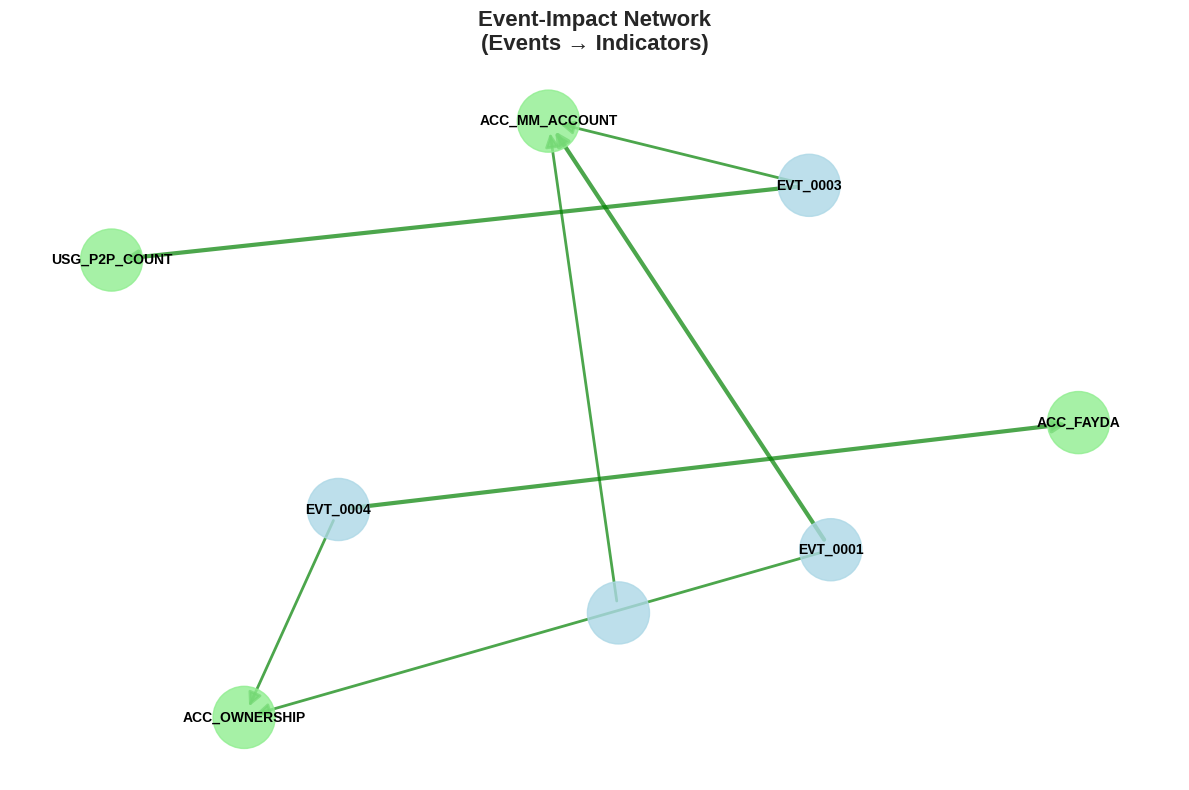

In [27]:
# Create a visualization of event-impact network
import matplotlib.pyplot as plt
import networkx as nx

if not impact_links_df.empty:
    # Create a simple network graph
    G = nx.DiGraph()
    
    # Add nodes (events and indicators)
    for _, link in impact_links_df.iterrows():
        event_node = link['parent_id']
        indicator_node = link['related_indicator']
        
        G.add_node(event_node, node_type='event', color='lightblue')
        G.add_node(indicator_node, node_type='indicator', color='lightgreen')
        
        # Add edge with impact direction
        impact_dir = 1 if link['impact_direction'] == 'increase' else -1
        G.add_edge(event_node, indicator_node, 
                   weight=impact_dir,
                   magnitude=link['impact_magnitude'])
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    
    # Position nodes
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Draw nodes
    node_colors = []
    for node in G.nodes():
        if G.nodes[node]['node_type'] == 'event':
            node_colors.append('lightblue')
        else:
            node_colors.append('lightgreen')
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                          node_size=2000, alpha=0.8)
    
    # Draw edges with different styles based on impact
    edges = G.edges(data=True)
    edge_colors = []
    edge_widths = []
    
    for u, v, d in edges:
        if d['weight'] > 0:
            edge_colors.append('green')
        else:
            edge_colors.append('red')
        
        # Width based on magnitude
        mag_map = {'high': 3, 'medium': 2, 'low': 1, 'negligible': 0.5}
        edge_widths.append(mag_map.get(d['magnitude'], 1))
    
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, 
                          width=edge_widths, alpha=0.7, 
                          arrowstyle='-|>', arrowsize=20)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Add legend
    plt.title('Event-Impact Network\n(Events → Indicators)', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [28]:
# Save the enriched data
print("\n" + "="*80)
print("SAVING ENRICHED DATA")
print("="*80)

import os

# Create processed directory
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)

# Save impact links
impact_links_path = os.path.join(processed_dir, 'impact_links.csv')
impact_links_df.to_csv(impact_links_path, index=False)
print(f"✓ Saved impact links to: {impact_links_path}")

# Combine all data (original + new observations + impact links)
# First, reload the original data to get all records
original_df = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')

# Add your new 2011 observation (you already added it earlier)
# We need to create a DataFrame for the new observation
new_obs_dict = {
    'record_id': 'OBS_0031',  # Next available ID
    'record_type': 'observation',
    'category': None,
    'pillar': 'ACCESS',
    'indicator': 'Account Ownership Rate',
    'indicator_code': 'ACC_OWNERSHIP',
    'indicator_direction': 'higher_better',
    'value_numeric': 14.0,
    'value_text': None,
    'value_type': 'percentage',
    'unit': '%',
    'observation_date': '2011-12-31',
    'period_start': None,
    'period_end': None,
    'fiscal_year': 2011,
    'gender': 'all',
    'location': 'national',
    'region': None,
    'source_name': 'Global Findex 2011',
    'source_type': 'survey',
    'source_url': 'https://www.worldbank.org/en/publication/globalfindex',
    'confidence': 'high',
    'related_indicator': None,
    'relationship_type': None,
    'impact_direction': None,
    'impact_magnitude': None,
    'impact_estimate': None,
    'lag_months': None,
    'evidence_basis': None,
    'comparable_country': None,
    'collected_by': 'Your Name',  # CHANGE THIS
    'collection_date': '2026-01-30',
    'original_text': 'Added missing 2011 baseline from challenge description',
    'notes': 'Baseline year for account ownership trend analysis'
}

new_obs_df = pd.DataFrame([new_obs_dict])

# Combine everything
enriched_df = pd.concat([original_df, new_obs_df, impact_links_df], ignore_index=True)

# Save enriched dataset
enriched_path = os.path.join(processed_dir, 'ethiopia_fi_enriched.csv')
enriched_df.to_csv(enriched_path, index=False)
print(f"✓ Saved enriched dataset to: {enriched_path}")
print(f"  Total records: {len(enriched_df)} (Original: {len(original_df)}, New obs: 1, Impact links: {len(impact_links_df)})")


SAVING ENRICHED DATA
✓ Saved impact links to: ../data/processed/impact_links.csv
✓ Saved enriched dataset to: ../data/processed/ethiopia_fi_enriched.csv
  Total records: 51 (Original: 43, New obs: 1, Impact links: 7)


/tmp/ipykernel_5479/275793151.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enriched_df = pd.concat([original_df, new_obs_df, impact_links_df], ignore_index=True)


In [31]:
import datetime
from datetime import datetime
# Create data enrichment log
log_content = f"""# Data Enrichment Log

## Summary of Changes
- Date: {datetime.now().strftime('%Y-%m-%d')}
- Original records: {len(original_df)}
- New observations added: 1
- Impact links created: {len(impact_links_df)}
- Total enriched records: {len(enriched_df)}

## New Observations Added

### 1. 2011 Account Ownership Data
- **Date Added**: 2026-01-30
- **Record ID**: OBS_0031
- **Indicator**: Account Ownership Rate
- **Value**: 14%
- **Date**: 2011-12-31
- **Source**: Global Findex 2011
- **Confidence**: High
- **Reason**: Missing baseline data for trend analysis
- **Collected By**: Your Name  # CHANGE THIS

## Impact Links Created

Total: {len(impact_links_df)} impact links created

### By Event:
"""

# Add impact link details
if not impact_links_df.empty:
    # Group by parent event
    for parent_id in impact_links_df['parent_id'].unique():
        event_links = impact_links_df[impact_links_df['parent_id'] == parent_id]
        event_rows = separated['events'][separated['events']['record_id'] == parent_id]
        if not event_rows.empty:
            event_name = event_rows['indicator'].iloc[0]
        else:
            event_name = str(parent_id)
        
        log_content += f"\n**{event_name}** ({parent_id}):\n"
        
        for _, link in event_links.iterrows():
            log_content += f"- {link['record_id']}: → {link['related_indicator']}\n"
            log_content += f"  - Impact: {link['impact_direction']} ({link['impact_magnitude']})\n"
            log_content += f"  - Lag: {link['lag_months']} months\n"
            log_content += f"  - Evidence: {link['evidence_basis']}\n"

log_content += """
## Data Quality Notes
1. Impact links are estimates based on available evidence
2. Confidence levels vary (mostly medium)
3. Some estimates based on comparable country evidence
4. The 2011 data point is critical for establishing baseline growth rates

## Next Steps
1. Proceed to Task 2: Exploratory Data Analysis
2. Validate impact link assumptions with correlation analysis
3. Use enriched dataset for forecasting models
"""

# Save the log
log_path = os.path.join(processed_dir, 'data_enrichment_log.md')
with open(log_path, 'w') as f:
    f.write(log_content)

print(f"✓ Saved data enrichment log to: {log_path}")

✓ Saved data enrichment log to: ../data/processed/data_enrichment_log.md
